# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas

## Importamos librerias

In [1]:
# Importamos las librerias de tensorflow y keras
import tensorflow as tf
from tensorflow import keras

# Liberias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## Importar el set de datos de moda de Mnist

El datasets contiene 70000 imagenes de 10 articulos de ropa. Estas imagenes tienen una resolución de 28 x 28 pixeles


In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploración del datasets

Explore el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:





In [13]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
len(y_train)

60000

In [17]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Preprocesado de los datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:



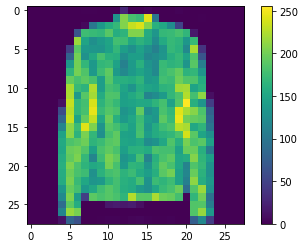

In [21]:
plt.figure()
plt.imshow(X_train[np.random.randint(60000)])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el training set y el testing set se pre-procesen de la misma forma:


In [23]:
X_train = X_train / 255.0
X_test = X_test / 255.0


Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

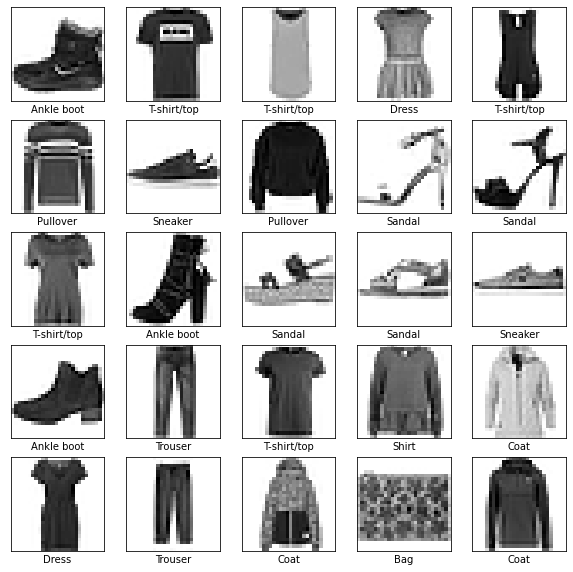

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

## Construimos y entrenamos el modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.



In [27]:
# Configurar las capas

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
])

# Layers.Flatten-> Transforma el formato de las imagenes de un formato 28 x 28 a un array unidimensional de 784 pixeles.
# Layers.Flatten-> Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

# Layers.Dense(1)-> La primera capa Dense tiene 128 nodos (o neuronas) y se activa mediante la funcion Relu.

# Layers.Dense(2)-> La segunda es una capa de 10 nodos softmax que devuelve un array de 10 probabilidades que suman a 1.
# Layers.Dense(2)-> Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen


In [28]:
# Compilar el modelo

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Optimizer -> Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida

# Loss function -> Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada

# Metrics -> Se usan para monitorear los pasos de entrenamiento y de pruebas


In [30]:
# Entrenar el modelo

model.fit(X_train, y_train, epochs=10)

# epochs -> Numero de veces que se entrena el modelo.

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2330 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2239 - accuracy: 0.9163
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2183 - accuracy: 0.9175
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2125 - accuracy: 0.9204
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2072 - accuracy: 0.9221
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2000 - accuracy: 0.9250
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1929 - accuracy: 0.9272
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1886 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1860 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.178

In [31]:
# Evaluar el modelo

model.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.3670 - accuracy: 0.8897


[0.36701512336730957, 0.8896999955177307]

Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a overfitting (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

## Realizar predicciones

In [48]:
predictions = model.predict(x_test)

In [33]:
predicciones[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [45]:
(np.argmax(predicciones[0]), class_names[np.argmax(predicciones[0])])


(9, 'Ankle boot')

El modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" 

## Graficaremos las respuestas

In [54]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


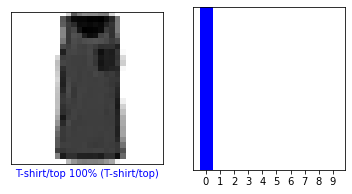

In [58]:
i = 3549
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

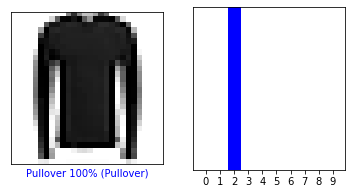

In [57]:
i = 2156
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

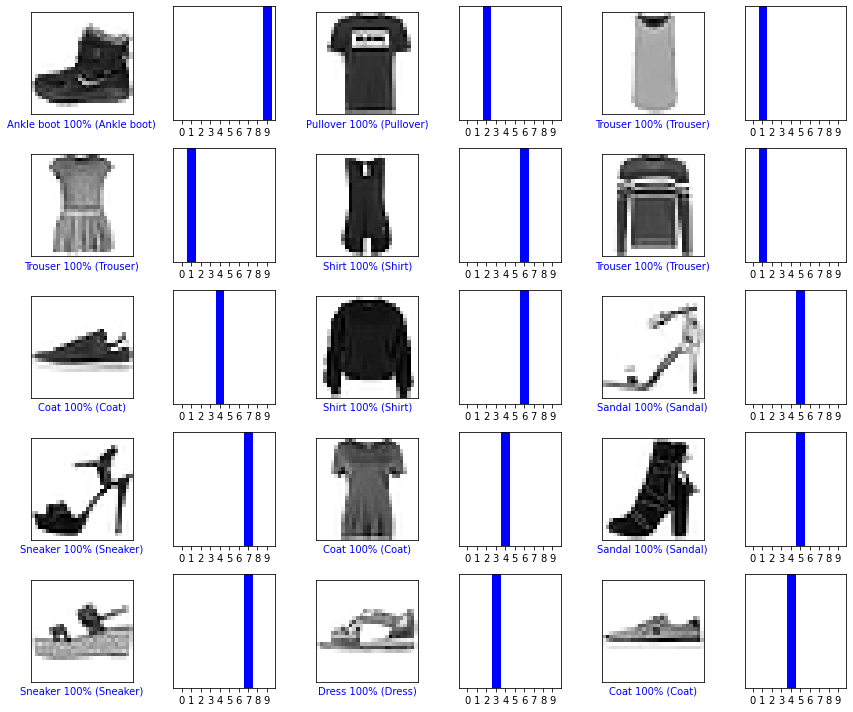

In [59]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_train)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()